<a href="https://colab.research.google.com/github/afitha789/7159-16514111/blob/main/Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.0728 - loss: 4.1630 - val_accuracy: 0.2020 - val_loss: 3.3474
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.2346 - loss: 3.1606 - val_accuracy: 0.2604 - val_loss: 3.0601
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.3051 - loss: 2.7959 - val_accuracy: 0.3112 - val_loss: 2.7835
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.3432 - loss: 2.6014 - val_accuracy: 0.3428 - val_loss: 2.6470
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.3772 - loss: 2.4390 - val_accuracy: 0.3524 - val_loss: 2.5798
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.4098 - loss: 2.3041 - val_accuracy: 0.3542 - val_loss: 2.5582
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.4341 - loss: 2.1906 - val_accuracy: 0.3692 - val_loss: 2.5366
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.4518 - loss: 2.0995 - 

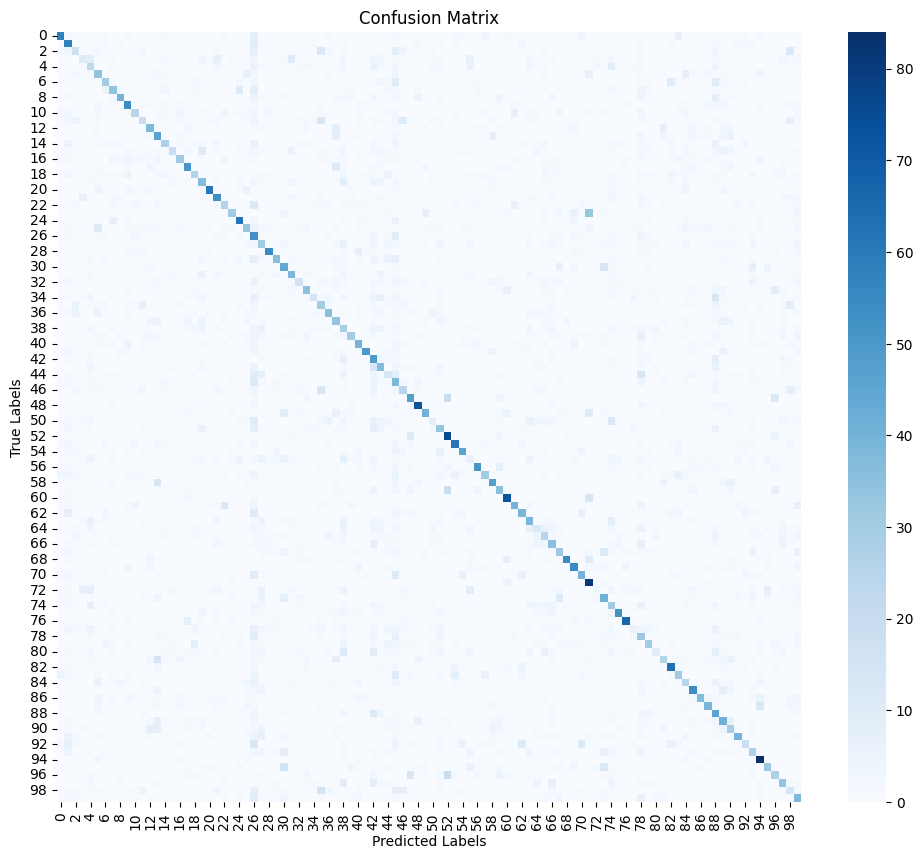

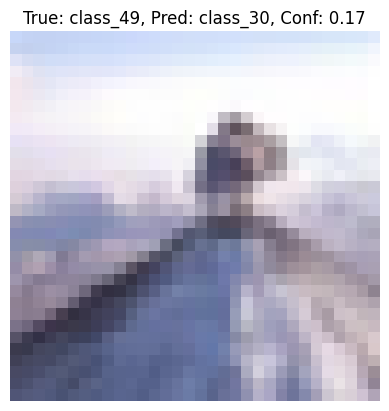

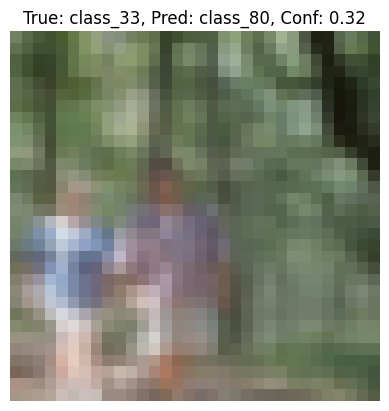

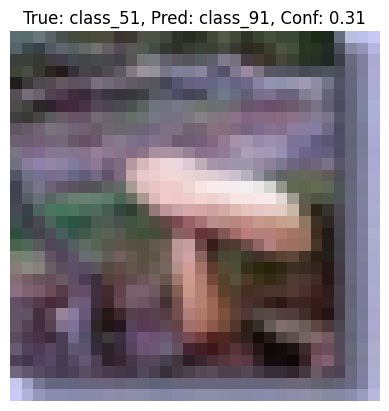

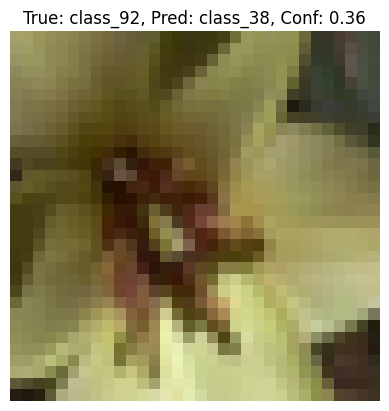

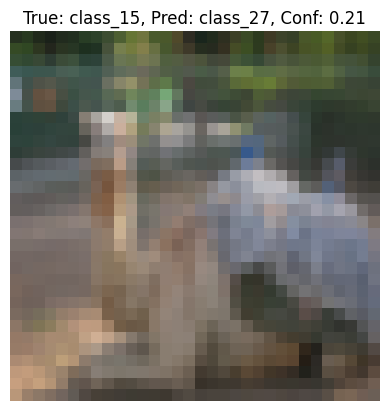

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# 2. Preprocess the Data
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train, 100)
y_test_cat = to_categorical(y_test, 100)

# 3. Build the Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
model.fit(x_train, y_train_cat, epochs=10, validation_data=(x_test, y_test_cat), batch_size=64, shuffle=True)

# 6. Evaluate the model on the test set
loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# 7. Predict on test set
pred_probs = model.predict(x_test)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = y_test.flatten()

# 8. Identify ambiguous predictions (low confidence)
confidence_scores = np.max(pred_probs, axis=1)
ambiguous_indices = np.where(confidence_scores < 0.5)[0]
print(f"\nNumber of ambiguous predictions (confidence < 0.5): {len(ambiguous_indices)}")

# 9. Confusion Matrix
conf_matrix = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 10. Visualize a few ambiguous predictions
# Replace this list with the actual 100 CIFAR-100 class names
true_labels = [f'class_{i}' for i in range(100)]

for i in ambiguous_indices[:5]:
    plt.imshow(x_test[i])
    pred_label = true_labels[pred_classes[i]]
    true_label = true_labels[true_classes[i]]
    confidence = confidence_scores[i]
    plt.title(f"True: {true_label}, Pred: {pred_label}, Conf: {confidence:.2f}")
    plt.axis('off')
    plt.show()